<div style="background-color: #00008B; padding: 20px;">
    <h1 style="font-size: 100px; color: #ffffff;">Principal Component Analysis</h1>
</div>


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

<div style="border: 2px solid blue; background-color: #f0f8ff; border-radius: 10px; padding: 15px;">
    <h2 style="color: blue;">Introduction to Principal Component Analysis (PCA)</h2>
    <p style="font-size: 16px; color: navy;">
        Principal Component Analysis (PCA) is a fundamental technique used in data analysis and dimensionality reduction. It is widely employed in various fields, including machine learning, statistics, and data visualization.
    </p>
    <p style="font-size: 16px; color: navy;">
        At its core, PCA aims to identify the most important features or patterns in a dataset and represent them in a more concise form. By transforming high-dimensional data into a lower-dimensional space, PCA enables visualization, exploration, and interpretation of complex datasets.
    </p>
    <p style="font-size: 16px; color: navy;">
        In practical terms, PCA achieves dimensionality reduction by finding a set of orthogonal axes, called principal components, along which the data varies the most. These principal components capture the maximum variance in the original dataset, allowing for a compact representation of the data with minimal loss of information.
    </p>
    <p style="font-size: 16px; color: navy;">
        Throughout this notebook, we will explore the intuition behind PCA, its applications, and practical implementation using Python and popular libraries such as NumPy and scikit-learn. By the end, you will have a solid understanding of PCA's role in data analysis and how to leverage it effectively in your own projects.
    </p>
</div>


<div style="border: 2px solid black; border-radius: 10px; padding: 15px;">
    <h2 style="color: purple;">Mathematical Explanation of Principal Component Analysis (PCA)</h2>
    <p style="font-size: 16px;">
        Principal Component Analysis (PCA) is a powerful statistical technique used to identify patterns in data and express data in a way that highlights their similarities and differences. The main goal of PCA is to reduce the dimensionality of a dataset while preserving as much variance (information) as possible.
    </p>
    <h3 style="color: purple;">Steps Involved in PCA:</h3>
    <ol style="font-size: 16px;">
        <li><b>Standardization:</b> Since PCA is affected by the scale of the variables, we first standardize the data. This ensures each feature contributes equally to the analysis.</li>
        <li><b>Covariance Matrix Computation:</b> Calculate the covariance matrix to understand the relationships between the variables in the data.</li>
        <li><b>Eigenvalue and Eigenvector Calculation:</b> Compute the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors determine the directions of the new feature space, and the eigenvalues determine their magnitude.</li>
        <li><b>Feature Vector:</b> Form a feature vector by selecting the top \( k \) eigenvectors that correspond to the largest eigenvalues.</li>
        <li><b>Recasting the Data:</b> Transform the original dataset using the feature vector to obtain the new \( k \)-dimensional feature subspace.</li>
    </ol>
    <h3 style="color: purple;">Mathematical Formulation:</h3>
    <p style="font-size: 16px;">
        Given a dataset \( X \) with \( n \) observations and \( p \) variables, the standardized data \( Z \) is computed as:
    </p>
    $$
    Z = \frac{X - \mu}{\sigma}
    $$
    <p style="font-size: 16px;">
        where \( \mu \) is the mean and \( \sigma \) is the standard deviation.
    </p>
    <p style="font-size: 16px;">
        The covariance matrix \( \Sigma \) of the standardized data is:
    </p>
    $$
    \Sigma = \frac{1}{n-1} Z^T Z
    $$
    <p style="font-size: 16px;">
        Next, we solve for the eigenvalues \( \lambda \) and eigenvectors \( v \) of the covariance matrix:
    </p>
    $$
    \Sigma v = \lambda v
    $$
    <p style="font-size: 16px;">
        We select the top \( k \) eigenvectors to form the feature vector \( V \):
    </p>
    $$
    V = [v_1, v_2, \ldots, v_k]
    $$
    <p style="font-size: 16px;">
        Finally, the original data is transformed into the new feature subspace \( Y \) using:
    </p>
    $$
    Y = Z V
    $$
    <p style="font-size: 16px;">
        This results in a \( k \)-dimensional representation of the data that captures the most significant variance.
    </p>
</div>


<div style="border: 2px solid purple; border-radius: 10px;  padding: 15px;">
    <h2 style="color: purple;">Applying PCA to the MNIST Dataset</h2>
    <p style="font-size: 16px;">
        To provide a concrete example of Principal Component Analysis (PCA), we will apply it to the MNIST dataset. The MNIST dataset consists of 60,000 images of handwritten digits (0-9), each represented as a 28x28 pixel grid, resulting in 784 features per image.
    </p>
    <p style="font-size: 16px;">
        The goal is to reduce the dimensionality of the MNIST data from 784 dimensions to 2 dimensions. This reduction allows us to visualize the data in a 2D scatter plot, where each point represents an image of a digit. We will use different colors to represent different categories (labels) in the scatter plot. The labels in the MNIST dataset range from 0 to 9, corresponding to the digit each image represents.
    </p>
    <p style="font-size: 16px;">
        By reducing the dimensionality and visualizing the data in this way, we can gain insights into the structure and distribution of the digit images. We can observe how different digits cluster together and how well the PCA transformation captures the variance in the data.
    </p>
    <p style="font-size: 16px;">
        Below is a scatter plot of the MNIST dataset after applying PCA to reduce the dimensions to 2. Each point in the plot represents an image, and the color indicates the digit label (0-9).
    </p>
</div>


In [3]:
mnist_data = pd.read_csv(r'C:\D\Python\Python-Projects\PYTORCH_NOTEBOOKS\PYTORCH_NOTEBOOKS\mnist_train_csv\mnist_train.csv')

C:\Users\rasou\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rasou\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


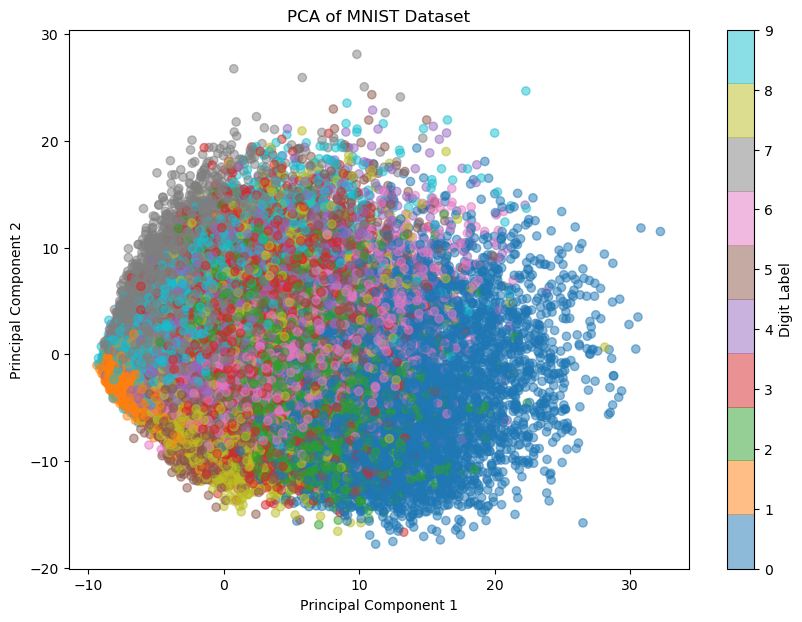

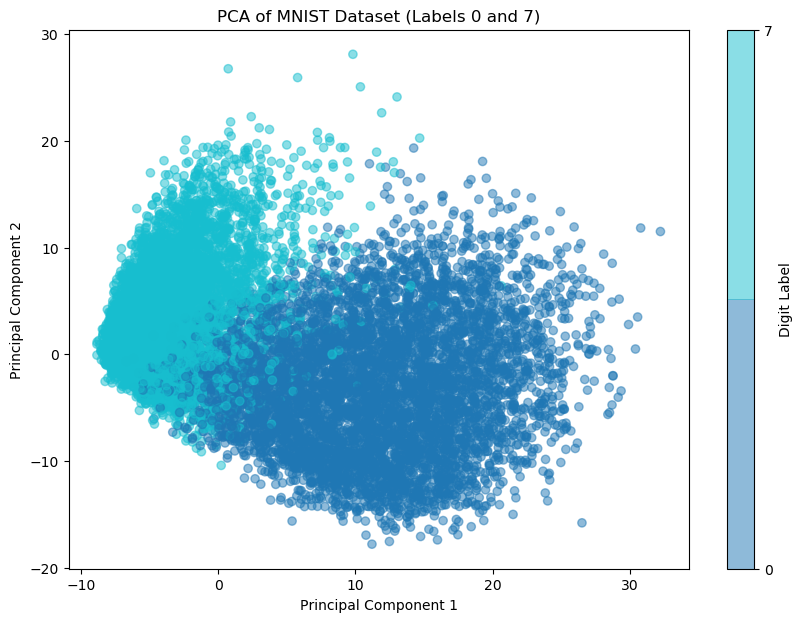

In [9]:
# Separate labels and features
labels = mnist_data.iloc[:, 0]
features = mnist_data.iloc[:, 1:]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with the principal components and labels
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Label'] = labels

# Plot the results for all labels
plt.figure(figsize=(10, 7))
palette = sns.color_palette("hsv", 10)  # Using a different colormap for more distinguishable colors
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Label'], cmap=plt.cm.get_cmap('tab10', 10), alpha=0.5)
plt.colorbar(scatter, label='Digit Label', ticks=range(10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Dataset')
plt.show()

# Filter the DataFrame for labels 0 and 7
pca_df_0_7 = pca_df[pca_df['Label'].isin([0, 7])]

# Plot the results for labels 0 and 7 only
plt.figure(figsize=(10, 7))
scatter_0_7 = plt.scatter(pca_df_0_7['Principal Component 1'], pca_df_0_7['Principal Component 2'], c=pca_df_0_7['Label'], cmap=plt.cm.get_cmap('tab10', 2), alpha=0.5)
plt.colorbar(scatter_0_7, label='Digit Label', ticks=[0, 7])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Dataset (Labels 0 and 7)')
plt.show()


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px;">
    <h2 style="color: purple;">Why Do We Need to Standardize Features?</h2>
    <p style="font-size: 16px;">
        Standardizing features is an important preprocessing step in many machine learning algorithms, including PCA. The primary reason for standardizing features is to ensure that all features contribute equally to the model. When features are on different scales, those with larger scales can dominate the analysis, leading to biased results.
    </p>
    <p style="font-size: 16px;">
        For example, in the MNIST dataset, the pixel values range from 0 to 255, while other features might have a different range. Without standardization, the features with larger scales could disproportionately influence the outcome of the PCA, overshadowing the importance of other features. By standardizing the features, we bring all features to the same scale, typically with a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.
    </p>
    <p style="font-size: 16px;">
        In summary, standardizing features helps to prevent certain features from dominating the analysis due to their scale, ensuring a fair and balanced contribution from all features.
    </p>
</div>


<div style="border: 2px solid black; border-radius: 10px; padding: 15px;">
    <h2 style="color: purple;">Mathematical Explanation of Standardizing Features</h2>
    <p style="font-size: 16px;">
        Standardizing features involves transforming the data such that each feature has a mean of 0 and a standard deviation of 1. This process is crucial in PCA because PCA seeks to identify the directions (principal components) that maximize the variance in the data. If the features are on different scales, the principal components will be biased towards features with larger scales.
    </p>
    <p style="font-size: 16px;">
        Mathematically, the standardization process for a feature $x$ is given by:
    </p>
    <p style="font-size: 16px; text-align: center;">
        $ x_{\text{standardized}} = \frac{x - \mu}{\sigma} $
    </p>
    <p style="font-size: 16px;">
        Where:
        <ul>
            <li>$ \mu $ is the mean of the feature $ x $.</li>
            <li>$ \sigma $ is the standard deviation of the feature $ x $.</li>
        </ul>
    </p>
    <p style="font-size: 16px;">
        By transforming the features in this way, we ensure that each feature has a mean of 0 and a standard deviation of 1. This transformation makes the features dimensionless and places them on a common scale, allowing PCA to treat all features equally, regardless of their original scales.
    </p>
    <p style="font-size: 16px;">
        Without standardization, features with larger variances would dominate the principal components, leading to biased and less interpretable results. Standardization ensures that the PCA captures the true structure and relationships within the data.
    </p>
</div>


<div style="border: 2px solid black; border-radius: 10px; padding: 15px;">
    <h2 style="color: purple;">Is Standardization Necessary for MNIST Dataset?</h2>
    <p style="font-size: 16px;">
        Even though the columns in the MNIST dataset either contain entirely zero values or vary between 0 and 255, standardizing the features remains a crucial preprocessing step. This is because:
    </p>
    <p style="font-size: 16px;">
        <b>Consistency in Scale</b>: Standardizing ensures that all features contribute equally to the analysis. Without standardization, certain pixel intensities might disproportionately influence the PCA results due to their larger values.
    </p>
    <p style="font-size: 16px;">
        <b>Dimensional Consistency</b>: Standardization brings all features to a common scale. This consistency is vital in PCA, which aims to maximize variance and identify the true patterns and structures in the data.
    </p>
    <p style="font-size: 16px;">
        <b>Numerical Stability</b>: Standardizing features enhances the numerical stability of algorithms. When dealing with large datasets or features with significant value ranges, numerical instability can occur, leading to inaccurate results.
    </p>
    <p style="font-size: 16px;">
        In summary, even though all pixel values in the MNIST dataset are within a similar range, standardization ensures each pixel (feature) is treated equally. This step prevents biases and ensures that the principal components identified by PCA are meaningful and comparable.
    </p>
</div>



<div style="border: 2px solid purple; border-radius: 10px; padding: 15px;">
    <h2 style="color: purple;">What is A/B Testing?</h2>
    <p style="font-size: 16px;">
        A/B testing, also known as split testing, is a method used to compare two versions of a webpage, app, or other user experience to determine which one performs better. The goal is to identify changes that increase a desired outcome, such as clicks, conversions, or other user interactions.
    </p>
    <p style="font-size: 16px;">
        In an A/B test, two variants (A and B) are compared: Variant A is the control, and Variant B is the test. A portion of your audience is shown Variant A, while another portion is shown Variant B. The performance of each variant is then measured based on predefined metrics.
    </p>
    <h3 style="color: purple;">How Does A/B Testing Work?</h3>
    <ul style="font-size: 16px;">
        <li><b>Identify the Goal:</b> Determine what you want to achieve with the test, such as increasing the click-through rate, sign-ups, or purchases.</li>
        <li><b>Choose a Variable:</b> Select the element you want to test. This could be a headline, button color, layout, or any other aspect of your user interface.</li>
        <li><b>Create Variants:</b> Develop two versions of the element you are testing: the original (control) and a modified version (test).</li>
        <li><b>Split Your Audience:</b> Randomly assign your audience into two groups, ensuring that each group is similar and representative of your overall user base.</li>
        <li><b>Run the Test:</b> Show each group one of the two variants and collect data on how they interact with it.</li>
        <li><b>Analyze Results:</b> Compare the performance of the two variants based on your predefined metrics to see which one performs better.</li>
    </ul>
    <h3 style="color: purple;">Why Use A/B Testing?</h3>
    <p style="font-size: 16px;">
        A/B testing is a powerful tool for making data-driven decisions. It allows you to:
    </p>
    <ul style="font-size: 16px;">
        <li><b>Optimize User Experience:</b> Identify what works best for your users and improve their experience.</li>
        <li><b>Increase Conversions:</b> Make changes that can lead to higher conversion rates and better overall performance.</li>
        <li><b>Reduce Risks:</b> Test changes on a smaller scale before rolling them out to your entire audience, minimizing the risk of negative impacts.</li>
    </ul>
    <p style="font-size: 16px;">
        In summary, A/B testing is a methodical approach to comparing two versions of an element to determine which one performs better based on specific metrics. It helps in making informed decisions to enhance user engagement and achieve business goals.
    </p>
</div>